In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
net = InceptionV3()

In [24]:
from skimage import transform

def inception_predict(image):
    # Rescale image to 299x299, as required by InceptionV3
    image_prep = transform.resize(image, (299, 299, 3), mode='reflect')
    
    # Scale image values to [-1, 1], as required by InceptionV3
    image_prep = (img_as_float(image_prep) - 0.5) * 2
    
    predictions = decode_predictions(
        net.predict(image_prep[None, ...])
    )
    
    plt.imshow(image, cmap='gray')
    
    for pred in predictions[0]:
        (n, klass, prob) = pred
        print(f'{klass:>15} ({prob:.3f})')

   Egyptian_cat (0.904)
          tabby (0.054)
      tiger_cat (0.035)
           lynx (0.000)
    plastic_bag (0.000)


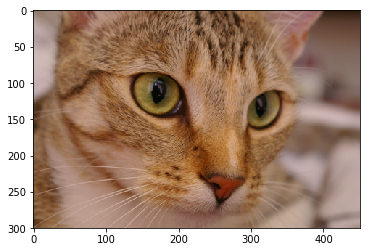

In [25]:
from skimage import data, img_as_float
inception_predict(data.chelsea())

         tripod (0.937)
         crutch (0.002)
     binoculars (0.002)
  reflex_camera (0.001)
       backpack (0.000)


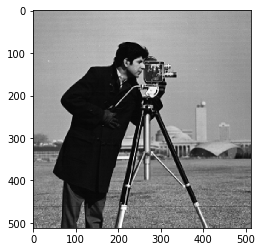

In [26]:
inception_predict(data.camera())

       espresso (0.982)
            cup (0.002)
     coffee_mug (0.001)
         eggnog (0.001)
 espresso_maker (0.001)


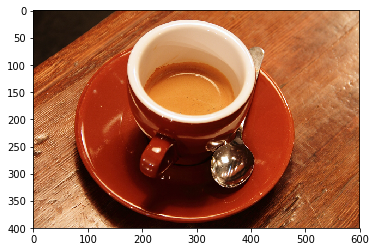

In [27]:
inception_predict(data.coffee())

          moped (0.508)
  motor_scooter (0.322)
     disk_brake (0.079)
   crash_helmet (0.009)
      car_wheel (0.002)


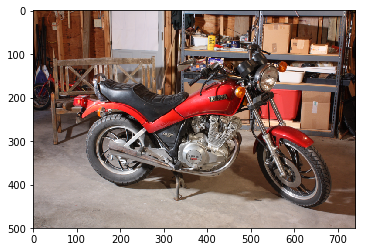

In [28]:
inception_predict(data.stereo_motorcycle()[0])